<a href="https://colab.research.google.com/github/AshutoshAgrahari/GoogleColab/blob/master/Intro_to_Convolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolution Neural Network

##### Ref: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%202%20-%20Notebook.ipynb

In [0]:
# loading the libraries
#import tensorflow as tf 
#from tensorflow import keras

# loading MNIST Fashion Dataset
#mnist = tf.keras.datasets.fashion_mnist
#(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalizing the Data
#training_images=training_images / 255.0
#test_images=test_images / 255.0

# buidling the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)
  

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4963 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3771 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3389 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3133 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2962 - acc: 0.8910


In [0]:
#print(training_images[0])
#import numpy as np
#np.shape(training_images[0])
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3455 - acc: 0.8749


In [10]:
#import tensorflow as tf
#print(tf.__version__)

#mnist = tf.keras.datasets.fashion_mnist

#(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

#train_images = train_images.reshape(60000, 28, 28, 1)
#train_images = train_images/255.0

#test_images = test_images.reshape(10000, 28, 28, 1)
#test_images = test_images/255.0

#print(test_images[0])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.98):
      print("\nReached 92% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
      
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape =(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

model.summary()
model.fit(train_images, train_labels, epochs=20, callbacks=[callbacks])
test_loss = model.evaluate(test_images, test_labels)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3920 - acc: 0.8616
Epoch 2/20
60000/60000 [========

# Visualizing the Convolutions and Pooling

In [0]:
#print(test_labels[:100])
print(test_labels[0])
print(test_labels[23])
print(test_labels[28])


9
9
9


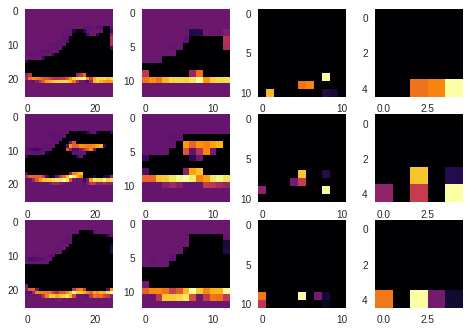

In [0]:
#import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)